In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
cars_data=pd.read_csv('cars_sampled.csv')
cars_data.head()
cars_data.shape

(50001, 19)

In [7]:
cars=cars_data.copy()

In [8]:
cars.info()
cars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

(50001, 19)

In [9]:
cars.describe()
pd.set_option('display.float_format',lambda x:'%.3f'%x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
pd.set_option('display.max_columns',500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [11]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col,axis=1)

In [12]:
cars.drop_duplicates(keep='first',inplace=True)

In [13]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

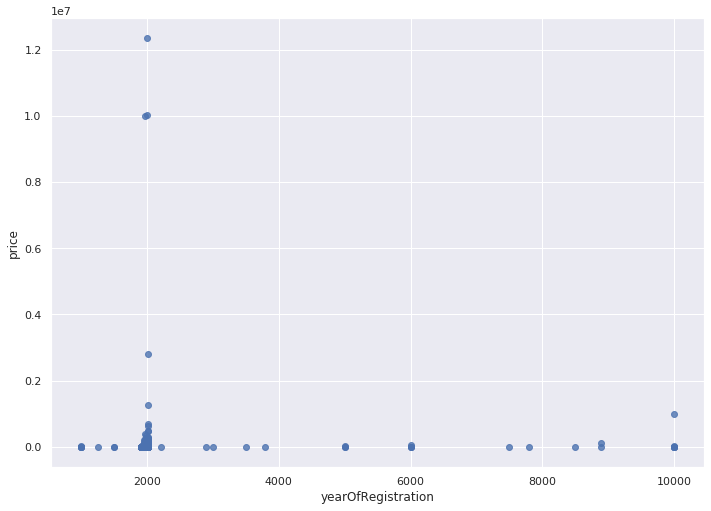

In [14]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration']>2018)
sum(cars['yearOfRegistration']<1950)
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=cars)

1748

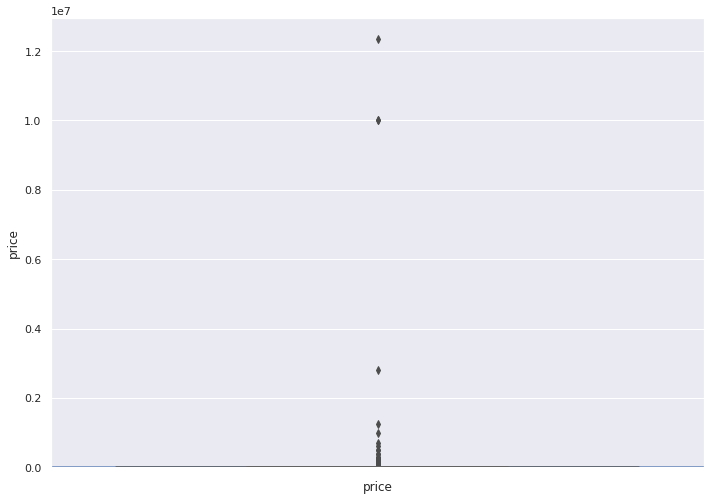

In [15]:
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price']>150000)
sum(cars['price']<100)


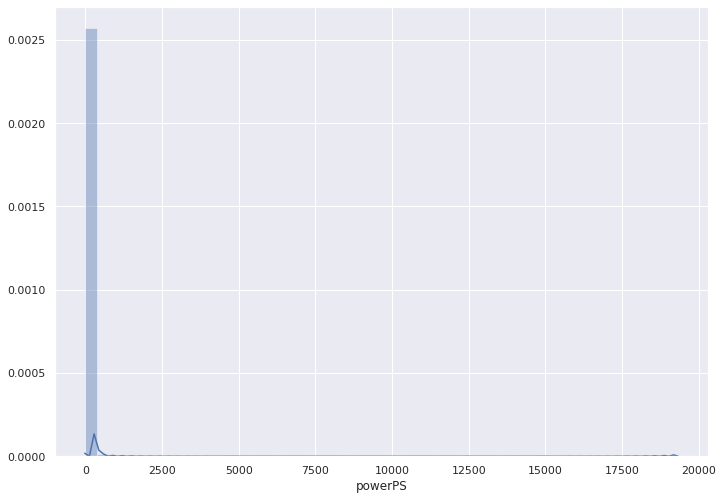

In [16]:
power_count=cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])

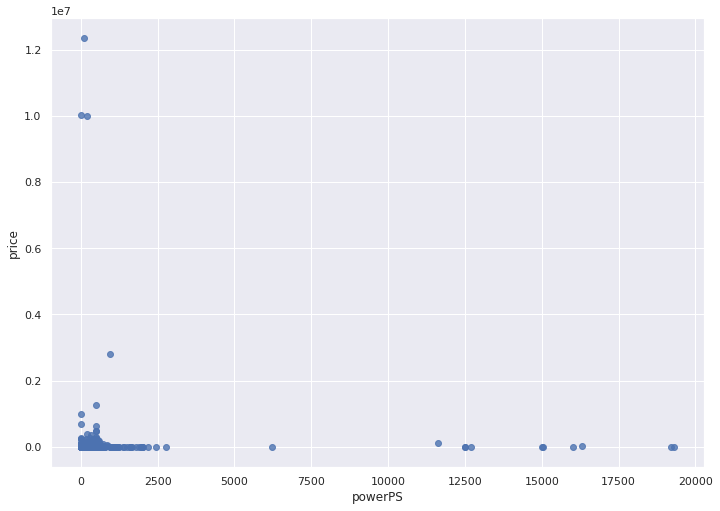

In [17]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [18]:
cars=cars[(cars.yearOfRegistration<=2018)
         &(cars.yearOfRegistration>=1950)
         &(cars.price>=100)
        &(cars.price<=150000)
        &(cars.powerPS>=10)
        &(cars.powerPS<=500)]
cars.shape

(42772, 14)

In [19]:
cars['monthOfRegistration']/=12
cars

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,private,offer,4450,test,limousine,2003,manual,150,3er,150000,0.250,diesel,bmw,NaN
1,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,0.500,diesel,volvo,no
2,private,offer,3200,test,bus,2003,manual,101,touran,150000,0.917,diesel,volkswagen,NaN
3,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,1.000,petrol,seat,no
4,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,0.917,diesel,volvo,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,private,offer,10900,test,limousine,2004,manual,231,x_reihe,150000,0.667,petrol,bmw,no
49992,private,offer,790,test,limousine,1998,manual,82,astra,150000,0.750,diesel,opel,no
49993,private,offer,830,test,small car,1999,manual,60,clio,125000,0.667,petrol,renault,no
49995,private,offer,2290,test,station wagon,2001,manual,101,astra,150000,0.250,petrol,opel,no


In [20]:
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()
#cars.head()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [21]:
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

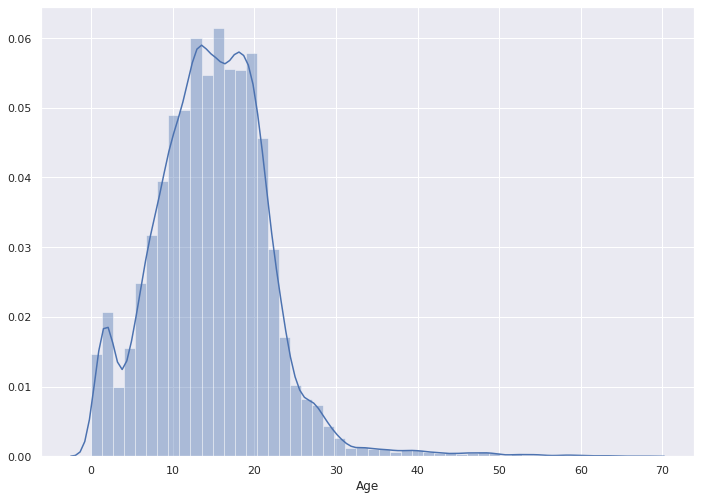

In [22]:
sns.distplot(cars['Age'])

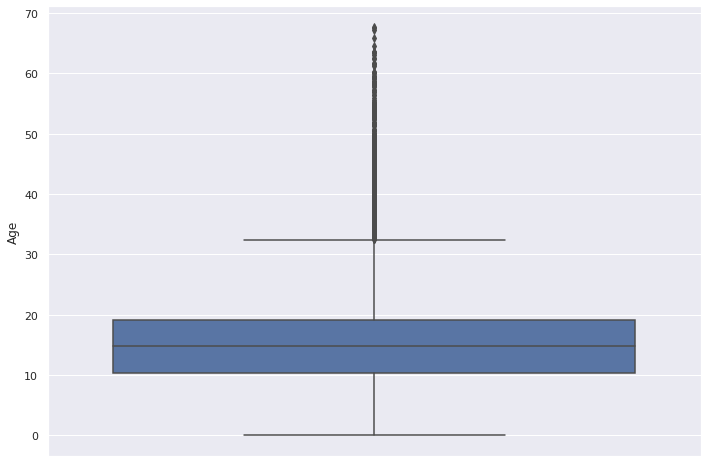

In [23]:
sns.boxplot(y=cars['Age'])


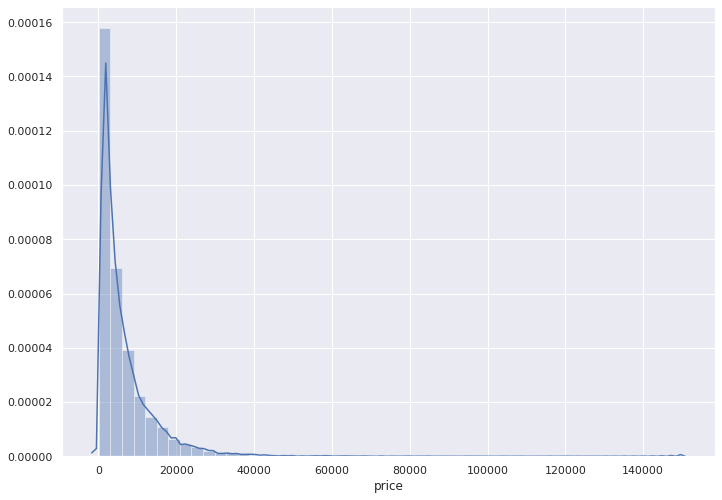

In [24]:
sns.distplot(cars['price'])

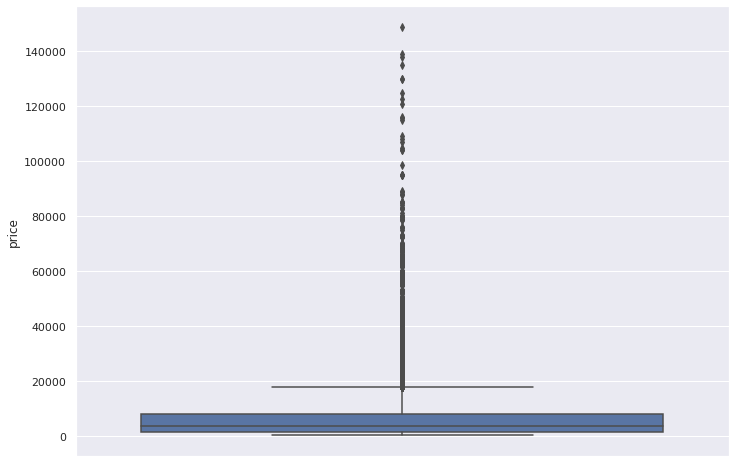

In [25]:
sns.boxplot(y=cars['price'])

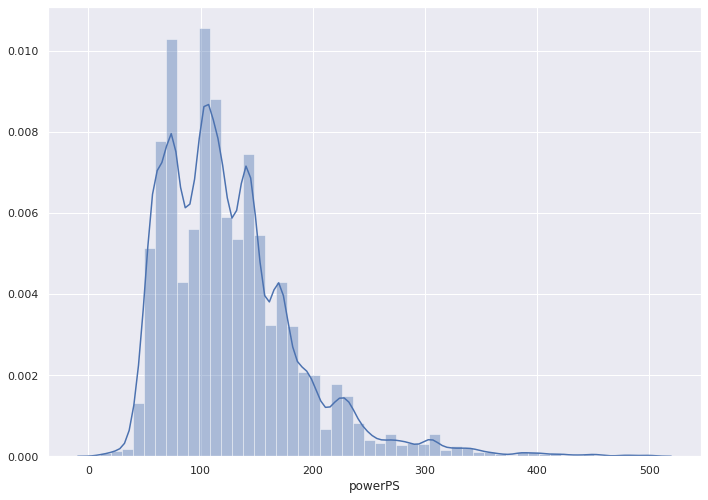

In [26]:
sns.distplot(cars['powerPS'])

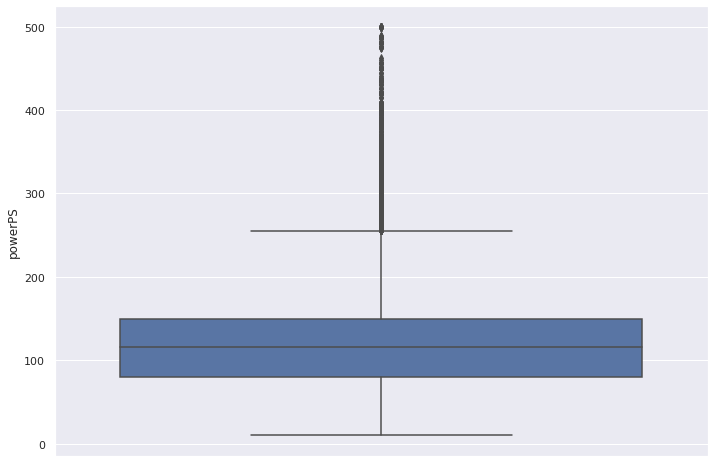

In [27]:
sns.boxplot(y=cars['powerPS'])

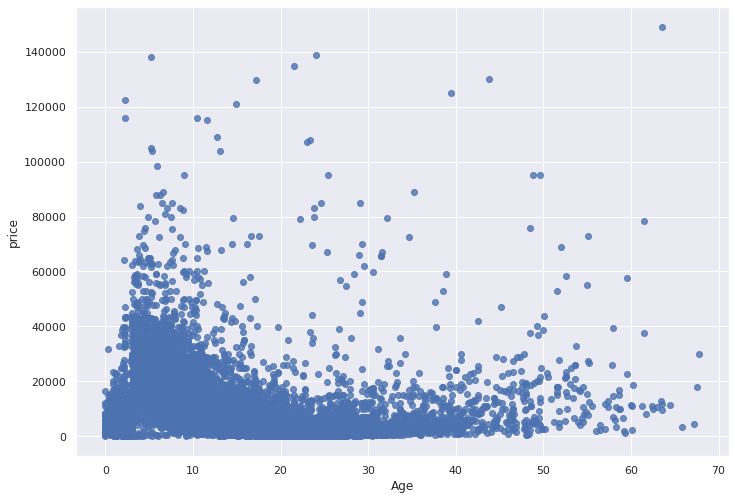

In [28]:
sns.regplot(x='Age',y='price',scatter=True,fit_reg=False,data=cars)

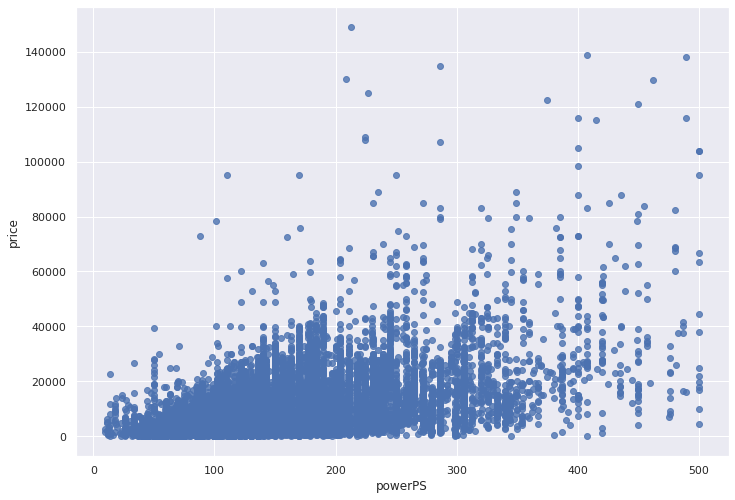

In [29]:
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=cars)

In [30]:
cars['seller'].value_counts()


private       42771
commercial        1
Name: seller, dtype: int64

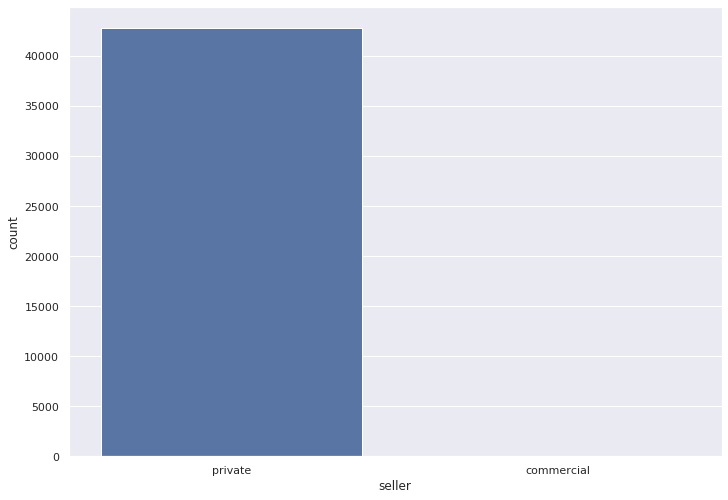

In [31]:
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=cars)

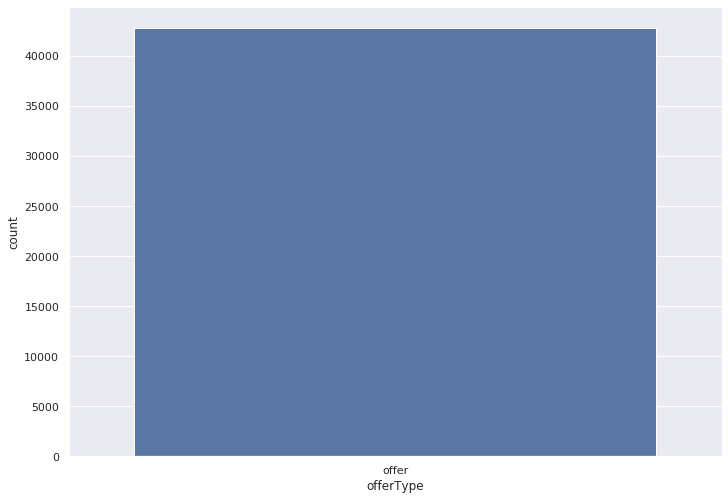

In [32]:
cars['offerType'].value_counts()
sns.countplot(x='offerType',data=cars)

In [33]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [34]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)


col_0,count
abtest,
control,0.483
test,0.517


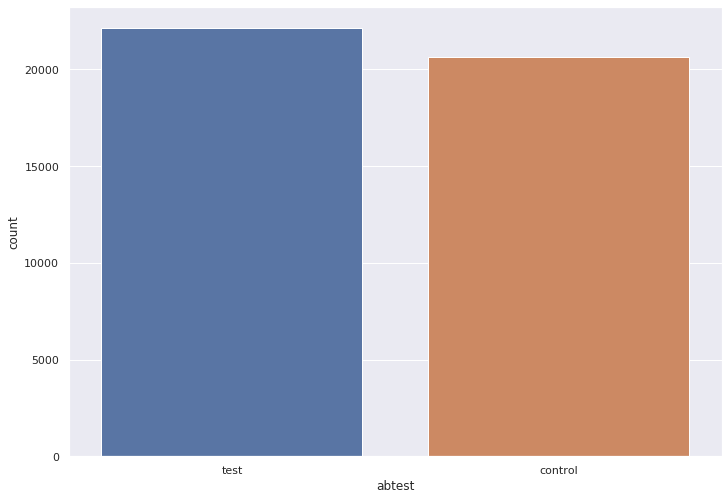

In [35]:
sns.countplot(x='abtest',data=cars)

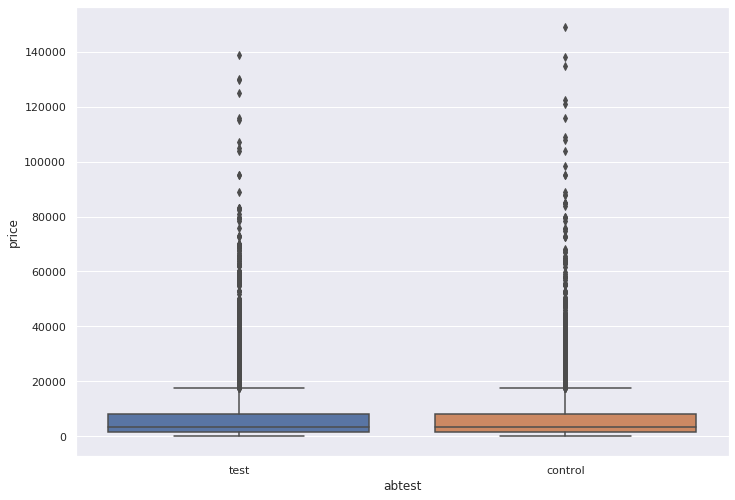

In [36]:
sns.boxplot(x='abtest',y='price',data=cars)

In [37]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [38]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


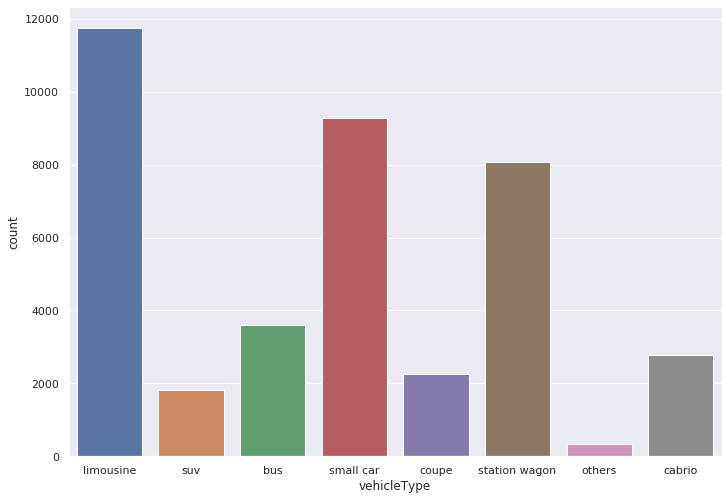

In [39]:
sns.countplot(x='vehicleType',data=cars)

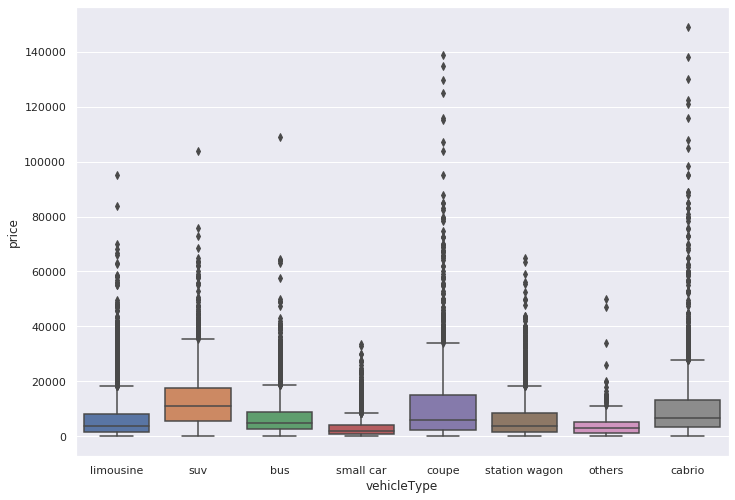

In [40]:
sns.boxplot(x='vehicleType',y='price',data=cars)

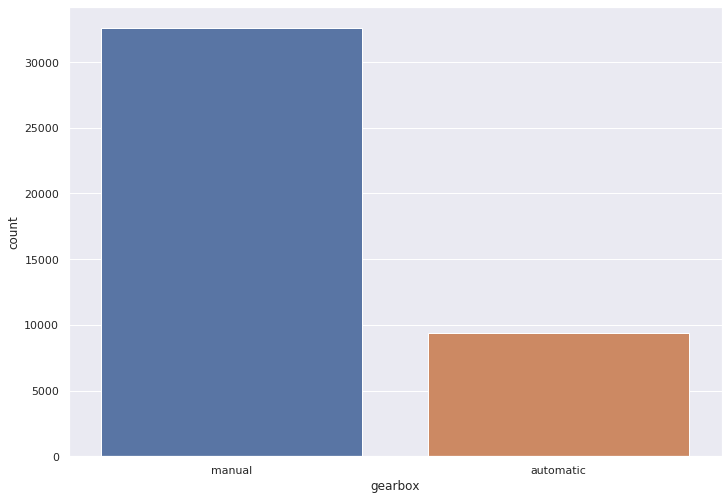

In [41]:
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x='gearbox',data=cars)

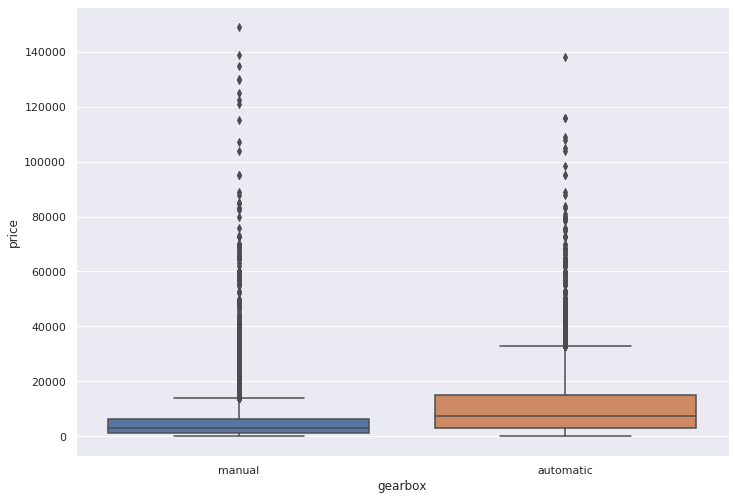

In [42]:
sns.boxplot(x='gearbox',y='price',data=cars)

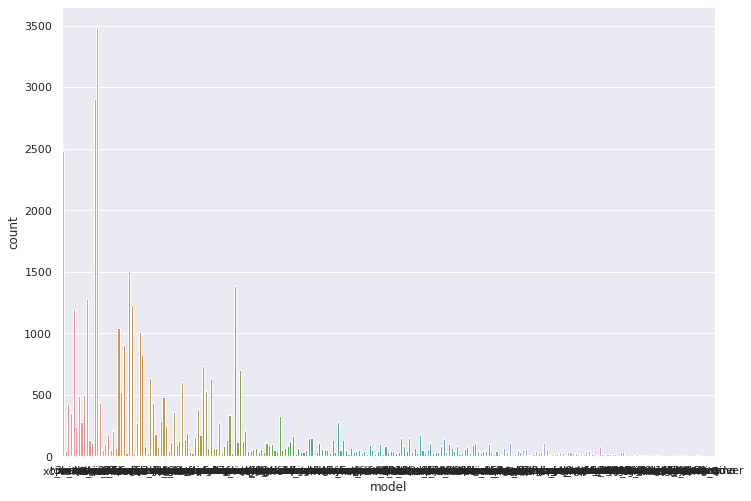

In [43]:
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x='model',data=cars)

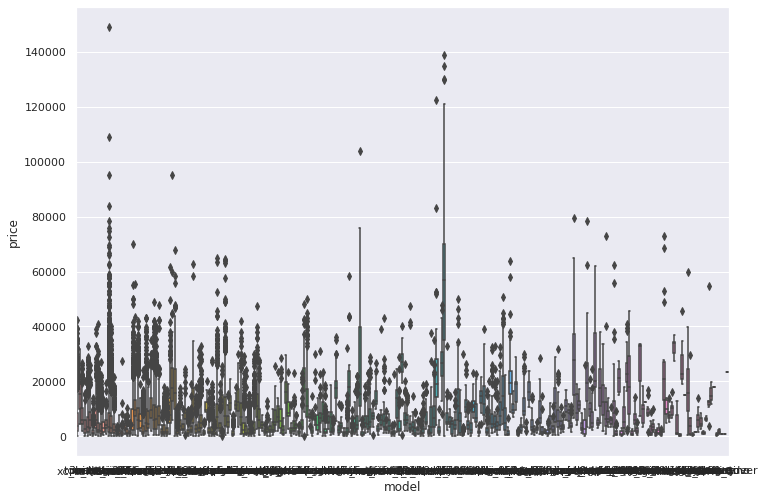

In [44]:
sns.boxplot(x='model',y='price',data=cars)

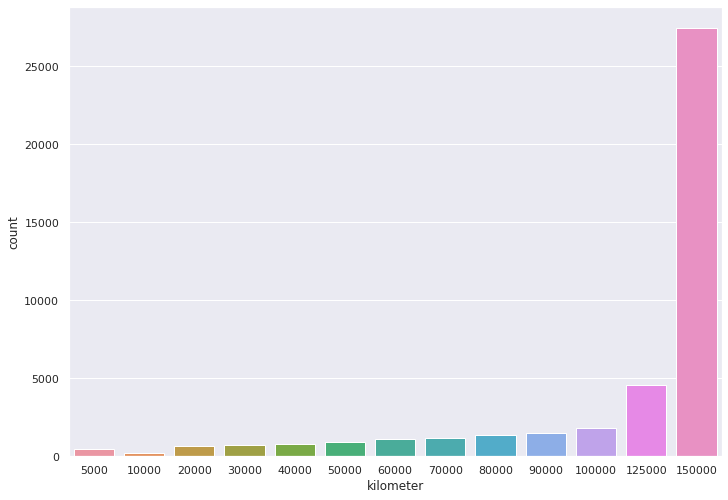

In [45]:
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.countplot(x='kilometer',data=cars)

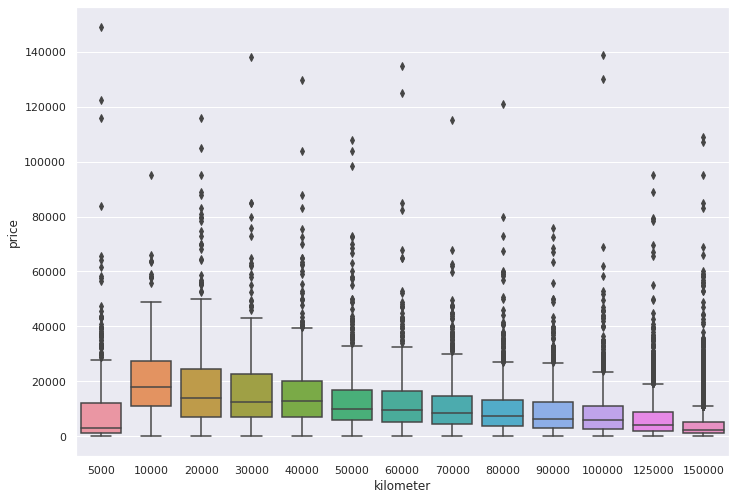

In [46]:
sns.boxplot(x='kilometer',y='price',data=cars)

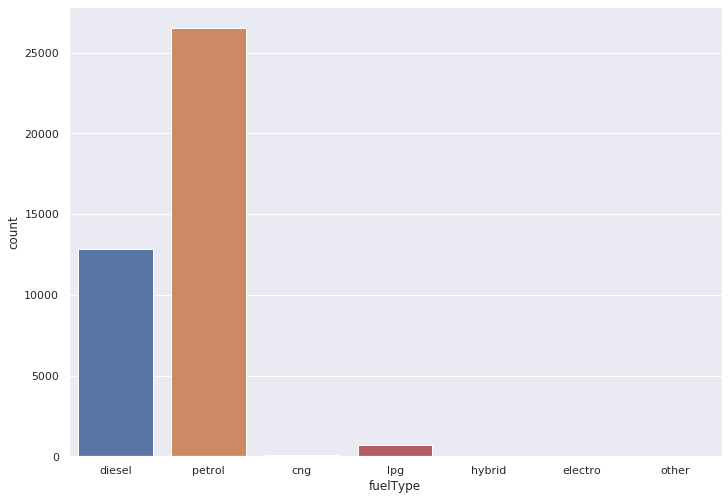

In [47]:
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x='fuelType',data=cars)

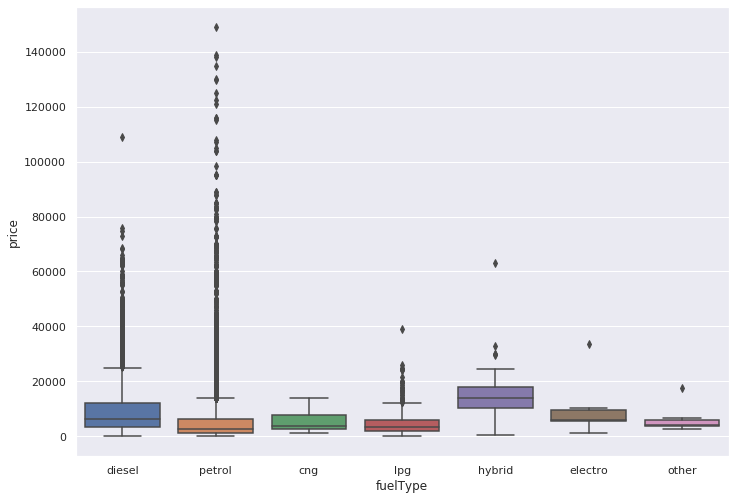

In [48]:
sns.boxplot(x='fuelType',y='price',data=cars)

[Text(0, 0, 'bmw'),
 Text(0, 0, 'volvo'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'seat'),
 Text(0, 0, 'mercedes_benz'),
 Text(0, 0, 'opel'),
 Text(0, 0, 'skoda'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'sonstige_autos'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'fiat'),
 Text(0, 0, 'alfa_romeo'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'land_rover'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'mini'),
 Text(0, 0, 'citroen'),
 Text(0, 0, 'jeep'),
 Text(0, 0, 'chrysler'),
 Text(0, 0, 'ford'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'dacia'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'smart'),
 Text(0, 0, 'trabant'),
 Text(0, 0, 'suzuki'),
 Text(0, 0, 'hyundai'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'kia'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'daihatsu'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'rover'),
 Text(0, 0, 'lancia'),
 Text(0, 0, 'daewoo'),
 Text(0, 0, 'lada')]

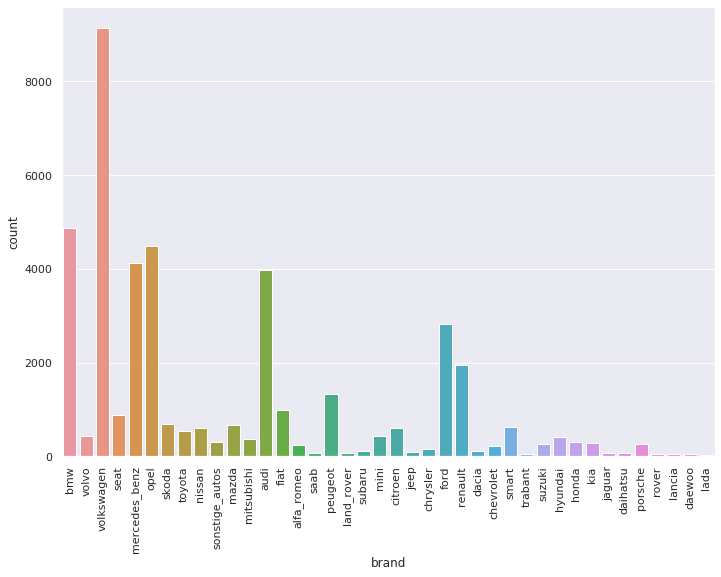

In [49]:
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
a=sns.countplot(x='brand',data=cars)
a.set_xticklabels(a.get_xticklabels(),rotation=90)

[Text(0, 0, 'bmw'),
 Text(0, 0, 'volvo'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'seat'),
 Text(0, 0, 'mercedes_benz'),
 Text(0, 0, 'opel'),
 Text(0, 0, 'skoda'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'sonstige_autos'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'fiat'),
 Text(0, 0, 'alfa_romeo'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'land_rover'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'mini'),
 Text(0, 0, 'citroen'),
 Text(0, 0, 'jeep'),
 Text(0, 0, 'chrysler'),
 Text(0, 0, 'ford'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'dacia'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'smart'),
 Text(0, 0, 'trabant'),
 Text(0, 0, 'suzuki'),
 Text(0, 0, 'hyundai'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'kia'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'daihatsu'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'rover'),
 Text(0, 0, 'lancia'),
 Text(0, 0, 'daewoo'),
 Text(0, 0, 'lada')]

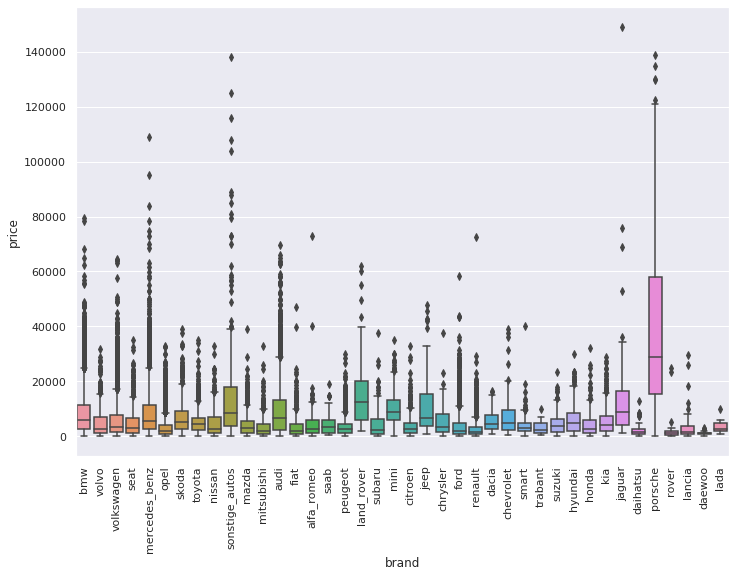

In [50]:
b=sns.boxplot(x='brand',y='price',data=cars)
b.set_xticklabels(b.get_xticklabels(),rotation=90)

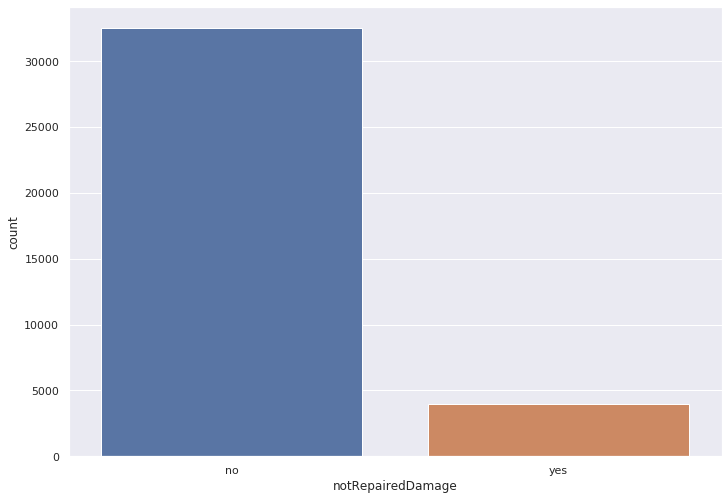

In [51]:
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x='notRepairedDamage',data=cars)


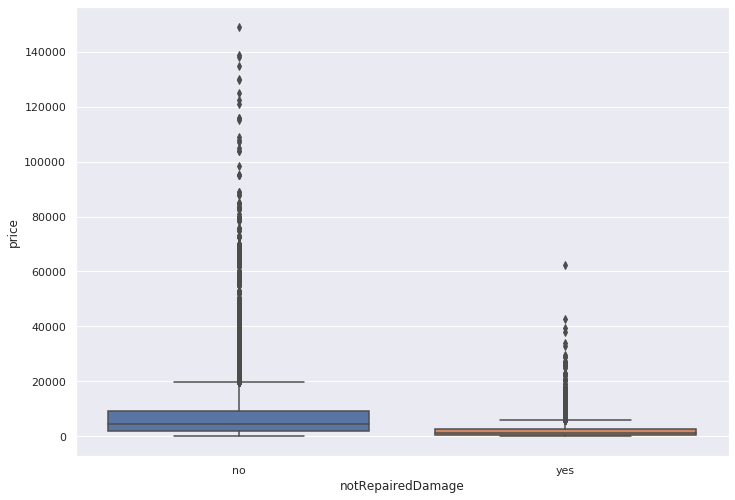

In [52]:
b=sns.boxplot(x='notRepairedDamage',y='price',data=cars)


In [53]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col,axis=1)
#ignore this cell its work has done but after that it was rerun so error occured.

In [80]:
cars_copy=cars.copy()
cars_copy.columns

Index(['price', 'vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer',
       'fuelType', 'brand', 'notRepairedDamage', 'Age'],
      dtype='object')

In [55]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [56]:
cars_omit=cars.dropna(axis=0)

In [57]:
cars_omit


,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,Age
1,13299,suv,manual,163,xc_reihe,150000,diesel,volvo,no,13.500
3,4500,small car,manual,86,ibiza,60000,petrol,seat,no,13.000
4,18750,suv,automatic,185,xc_reihe,150000,diesel,volvo,no,10.920
5,988,limousine,manual,90,passat,150000,petrol,volkswagen,no,23.170
7,1399,coupe,manual,136,clk,150000,petrol,mercedes_benz,no,21.920
...,...,...,...,...,...,...,...,...,...,...
49991,10900,limousine,manual,231,x_reihe,150000,petrol,bmw,no,14.670
49992,790,limousine,manual,82,astra,150000,diesel,opel,no,20.750
49993,830,small car,manual,60,clio,125000,petrol,renault,no,19.670
49995,2290,station wagon,manual,101,astra,150000,petrol,opel,no,17.250


In [58]:
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [60]:
x1=cars_omit.drop(['price'],axis='columns',inplace=False)

In [82]:
y1=cars_omit['price']
y1

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 32884, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b9fc02f90>,
      dtype=object)

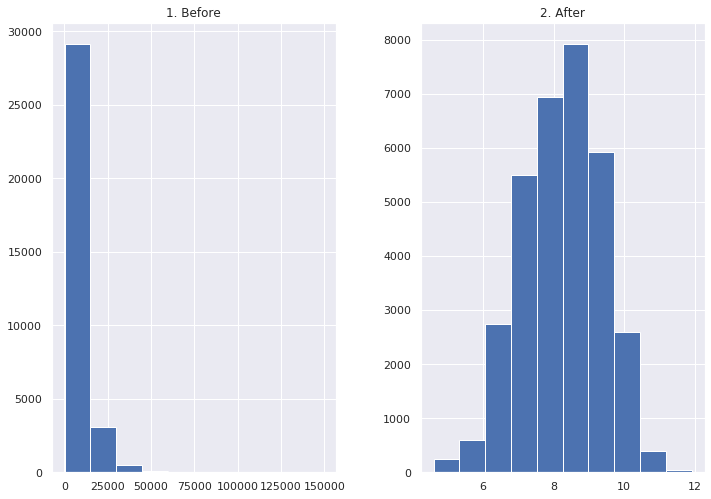

In [62]:
prices=pd.DataFrame({"1. Before":y1,"2. After":np.log(y1)})
prices.hist()

In [81]:
y1=np.log(y1)
y1

1       2.251
3       2.130
4       2.286
5       1.931
7       1.980
         ... 
49991   2.230
49992   1.898
49993   1.905
49995   2.046
50000   1.946
Name: price, Length: 32884, dtype: float64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [65]:
base_pred=np.mean(y_test)
print(base_pred)

8.249615787653337


In [66]:
base_pred=np.repeat(base_pred,len(y_test))

In [67]:
base_root_mean_square_error=np.sqrt(mean_squared_error(y_test,base_pred))
print(base_root_mean_square_error)

1.1274483657478247


# Linear regression with omitted data

In [68]:
lgr=LinearRegression(fit_intercept=True)

In [69]:
model_lin1=lgr.fit(x_train,y_train)
cars_prediction_lin1=lgr.predict(x_test)

In [70]:
lin_mse1=mean_squared_error(y_test,cars_prediction_lin1)
lin_rmse1=np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513831


In [71]:
r2_lin_test1=model_lin1.score(x_test,y_test)
r2_lin_train1=model_lin1.score(x_train,y_train)
print(r2_lin_test1,r2_lin_train1)

0.7658615091649253 0.7800936978183916


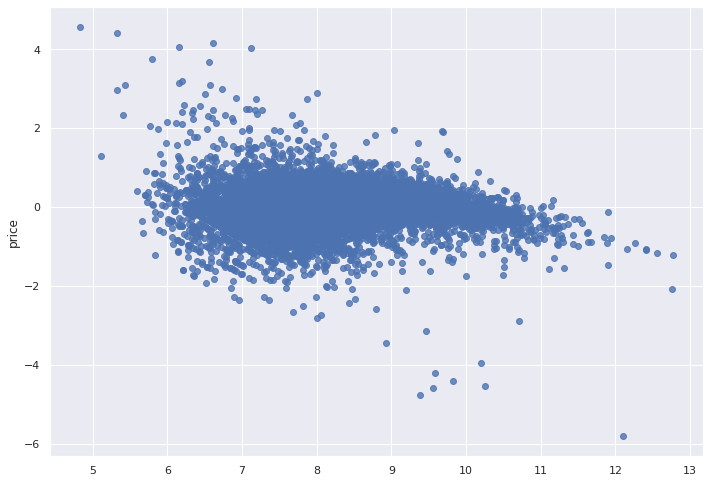

In [72]:
residual1=y_test-cars_prediction_lin1
sns.regplot(x=cars_prediction_lin1,y=residual1,scatter=True,fit_reg=False,data=cars)

In [73]:
residual1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

# Random forest with omitted data

In [74]:
rf=RandomForestRegressor(n_estimators=100,max_features='auto'
                        ,max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [76]:
model_rf1=rf.fit(x_train,y_train)

In [77]:
cars_predictions_rf1=rf.predict(x_test)
print(cars_predictions_rf1)

[8.70182348 9.57250428 8.19505376 ... 9.11387352 7.45210229 7.80044374]


In [141]:
rf_mse1=mean_squared_error(y_test,cars_predictions_rf1)
rf_rmse1=np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [173]:
r2_rf_test1=model_rf1.score(x_test,y_test)
r2_rf_train1=model_rf1.score(x_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


# model building with imputed data

In [145]:
cars_imputed=cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float'
                      else x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [146]:
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)

In [147]:
x2=cars_imputed.drop(['price'],axis='columns',inplace=False)
y2=cars_imputed['price']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcba223eb10>,
      dtype=object)

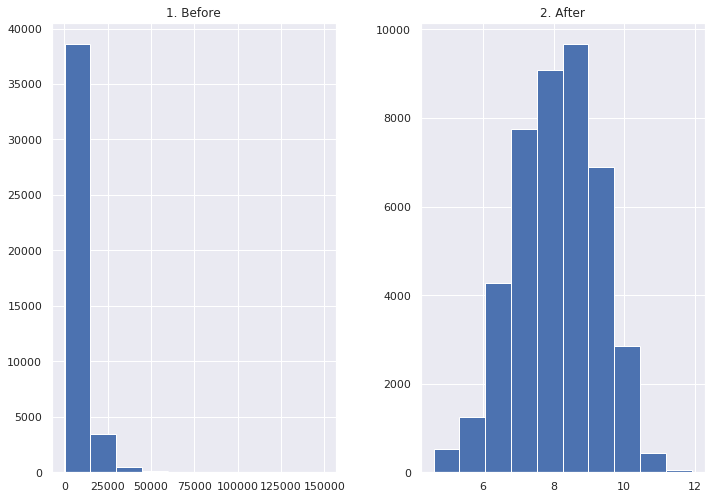

In [148]:
prices=pd.DataFrame({'1. Before':y2,"2. After":np.log(y2)})
prices.hist()

In [149]:
y2=np.log(y2)

In [151]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x2,y2,test_size=0.3,random_state=3)
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# baseline model for imputed data

In [157]:
base_pred=np.mean(y_test1)
print(base_pred)

8.068391740519193


In [158]:
base_pred=np.repeat(base_pred,len(y_test1))

In [159]:
base_root_mean_square_error_imputed=np.sqrt(mean_squared_error(y_test1,base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# Linear regression with imputed data

In [160]:
lgr2=LinearRegression(fit_intercept=True)

In [161]:
model_lin2=lgr2.fit(x_train1,y_train1)
cars_prediction_lin2=lgr2.predict(x_test1)

In [176]:
lin_mse2=mean_squared_error(y_test1,cars_prediction_lin2)
lin_rmse2=np.sqrt(lin_mse2)
print(lin_rmse2)

0.6483956449231306


In [180]:
r2_lin_test2=model_lin2.score(x_test1,y_test1)
r2_lin_train2=model_lin2.score(x_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.7023339008631175 0.7071658736894363


# Random forest with imputed data

In [165]:
rf2=RandomForestRegressor(n_estimators=100,max_features='auto'
                        ,max_depth=100,min_samples_split=10,
                        min_samples_leaf=4,random_state=1)

In [166]:
model_rf2=rf2.fit(x_train1,y_train1)

In [170]:
cars_predictions_rf2=rf2.predict(x_test1)

In [171]:
rf_mse2=mean_squared_error(y_test1,cars_predictions_rf2)
rf_rmse2=np.sqrt(rf_mse2)
print(rf_rmse2)

0.494313994408829


In [174]:
r2_rf_test2=model_rf2.score(x_test1,y_test1)
r2_rf_train2=model_rf2.score(x_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

0.8269964521311131 0.9024289431669166


# outputs

In [185]:
print("Metrics for models built from data where missing values were omitted")
print("R squared val for train from Linear regression = %s"%r2_lin_train1)
print("R squared val for test from Linear regression = %s"%r2_lin_test1)
print("R squared val for train from Random forest = %s"%r2_rf_train1)
print("R squared val for test from Random forest = %s"%r2_rf_test1)
print("\n\n")

print("Base RMSE of model built from data where missing vals were omitted = %s"%base_root_mean_square_error)
print("RMSE val for test from Linear regression = %s"%lin_rmse1)
print("RMSE val for test from Random forest = %s"%rf_rmse1)

print("\n\n")

print("Metrics for models built from data where missing values were imputed")
print("R squared val for train from Linear regression = %s"%r2_lin_train2)
print("R squared val for test from Linear regression = %s"%r2_lin_test2)
print("R squared val for train from Random forest = %s"%r2_rf_train2)
print("R squared val for test from Random forest = %s"%r2_rf_test2)
print("\n\n")

print("Base RMSE of model built from data where missing vals were omitted = %s"%base_root_mean_square_error_imputed)
print("RMSE val for test from Linear regression = %s"%lin_rmse2)
print("RMSE val for test from Random forest = %s"%rf_rmse2)


Metrics for models built from data where missing values were omitted
R squared val for train from Linear regression = 0.7800936978183916
R squared val for test from Linear regression = 0.7658615091649253
R squared val for train from Random forest = 0.9202494705146291
R squared val for test from Random forest = 0.8504018147750623



Base RMSE of model built from data where missing vals were omitted = 1.1419203004969716
RMSE val for test from Linear regression = 0.5455481266513831
RMSE val for test from Random forest = 0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared val for train from Linear regression = 0.7071658736894363
R squared val for test from Linear regression = 0.7023339008631175
R squared val for train from Random forest = 0.9024289431669166
R squared val for test from Random forest = 0.8269964521311131



Base RMSE of model built from data where missing vals were omitted = 1.1884349112889792
RMSE val for test from Linear reg